# Project 1

##  Team Members: Beth Ramsdell, Michael Murrietta, Kevin Chang

In [2]:
## Import packages used
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

## Purpose of Dataset
This dataset was procured from kaggle.com (https://www.kaggle.com/hhs/health-insurance-marketplace). 

The Centers for Medicare & Medicaid Services (CMS) Center for Consumer Information & Insurance Oversight (CCIIO) released the Marketplace data between 2014 and 2016 in order to improve transparency and increase access to the Marketplace data itself. The dataset includes rate plan data based on a persons age, tobacco use, geography, and dependents. This data can be used to understand the cost of healthcare based on the marketplaces provided across the nation. The data is important because the varied cost of healthcare across the nation has been significant and unpredictable. Understanding the underlying drivers of healthcare cost can help determine what drives the differnces in costs across states. We can measure the effectiveness of a good prediction based on the precision and accuracy results from a test set on the model across states.

As noted on Kaggle, a complete description of the data files included in this dataset are found on the CMS webiste (https://www.cms.gov/cciio/resources/data-resources/marketplace-puf.html). 

Reading some of the discussions on Kaggle regarding this dataset revealed that 9999 is likely a null value but this is not explictily stated in the documentation by CMS; for the purposes of this analysis we will regard 9999 as a null value.

## Importing the Dataset

In [3]:
## Reading the file in the local directory
rate = pd.read_csv("Rate.csv")
rate.columns

Index([u'BusinessYear', u'StateCode', u'IssuerId', u'SourceName',
       u'VersionNum', u'ImportDate', u'IssuerId2', u'FederalTIN',
       u'RateEffectiveDate', u'RateExpirationDate', u'PlanId', u'RatingAreaId',
       u'Tobacco', u'Age', u'IndividualRate', u'IndividualTobaccoRate',
       u'Couple', u'PrimarySubscriberAndOneDependent',
       u'PrimarySubscriberAndTwoDependents',
       u'PrimarySubscriberAndThreeOrMoreDependents', u'CoupleAndOneDependent',
       u'CoupleAndTwoDependents', u'CoupleAndThreeOrMoreDependents',
       u'RowNumber'],
      dtype='object')

## Exploring the data
The documentation on this dataset indicates that the columns in the above listing starting at 'IndividualRate' through 'CoupleAndThreeOrMoreDependents' are the premium rates during the year indicated by the value in the 'BusinessYear' column. With that in mind we'll get some simple statistics for these rates and explore how they relate.

In [3]:
print("The dataset includes " + "{:,}".format(rate.shape[0]) + " records across " + "{:,}".format(rate.shape[1]) + " variables")

The dataset includes 12,694,445 records across 24 variables


In [4]:
# Exploring simple statistics given by .describe()
rateCols = ['IndividualRate', 'IndividualTobaccoRate',
            'Couple', 'PrimarySubscriberAndOneDependent',
            'PrimarySubscriberAndTwoDependents',
            'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent',
            'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents']
rate.info()
rate[rateCols].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694445 entries, 0 to 12694444
Data columns (total 24 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
SourceName                                   object
VersionNum                                   int64
ImportDate                                   object
IssuerId2                                    int64
FederalTIN                                   object
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
Pr

,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
count,1.269444e+07,4.932349e+06,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000,40941.000000
mean,4.098026e+03,5.436911e+02,48.115714,49.835901,70.660012,89.405494,72.782793,89.012859,107.807774
std,6.122271e+04,2.945916e+02,30.422891,29.691985,44.620130,57.699279,48.232537,59.139094,73.241174
min,0.000000e+00,4.173000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.933000e+01,3.391200e+02,26.710000,27.390000,27.910000,29.410000,28.260000,28.260000,29.490000
50%,2.916000e+02,4.632900e+02,49.770000,51.240000,74.680000,98.800000,77.250000,97.910000,116.710000
75%,4.789800e+02,6.843900e+02,69.900000,72.230000,107.670000,137.080000,110.430000,136.330000,167.960000
max,9.999990e+05,6.604610e+03,182.400000,169.650000,251.740000,357.940000,260.850000,339.310000,449.140000


## Cleaning the data

Looks like the bad 9999 values show up in the IndividualRate column only so let's replace these. We'll see the new mean in for this column in the next section.

In [5]:
# Null values identified from the dataset
nullvalues = [999999,9999.99,9999]

rate[rateCols[0]] = rate[rateCols[0]].replace(nullvalues, np.nan)

## Simple Statistics from the data

In [6]:
for c in rateCols:
    print(c + " (Mean): " + "$%.2f" % rate[c].describe()['mean'])

IndividualRate (Mean): $315.77
IndividualTobaccoRate (Mean): $543.69
Couple (Mean): $48.12
PrimarySubscriberAndOneDependent (Mean): $49.84
PrimarySubscriberAndTwoDependents (Mean): $70.66
PrimarySubscriberAndThreeOrMoreDependents (Mean): $89.41
CoupleAndOneDependent (Mean): $72.78
CoupleAndTwoDependents (Mean): $89.01
CoupleAndThreeOrMoreDependents (Mean): $107.81


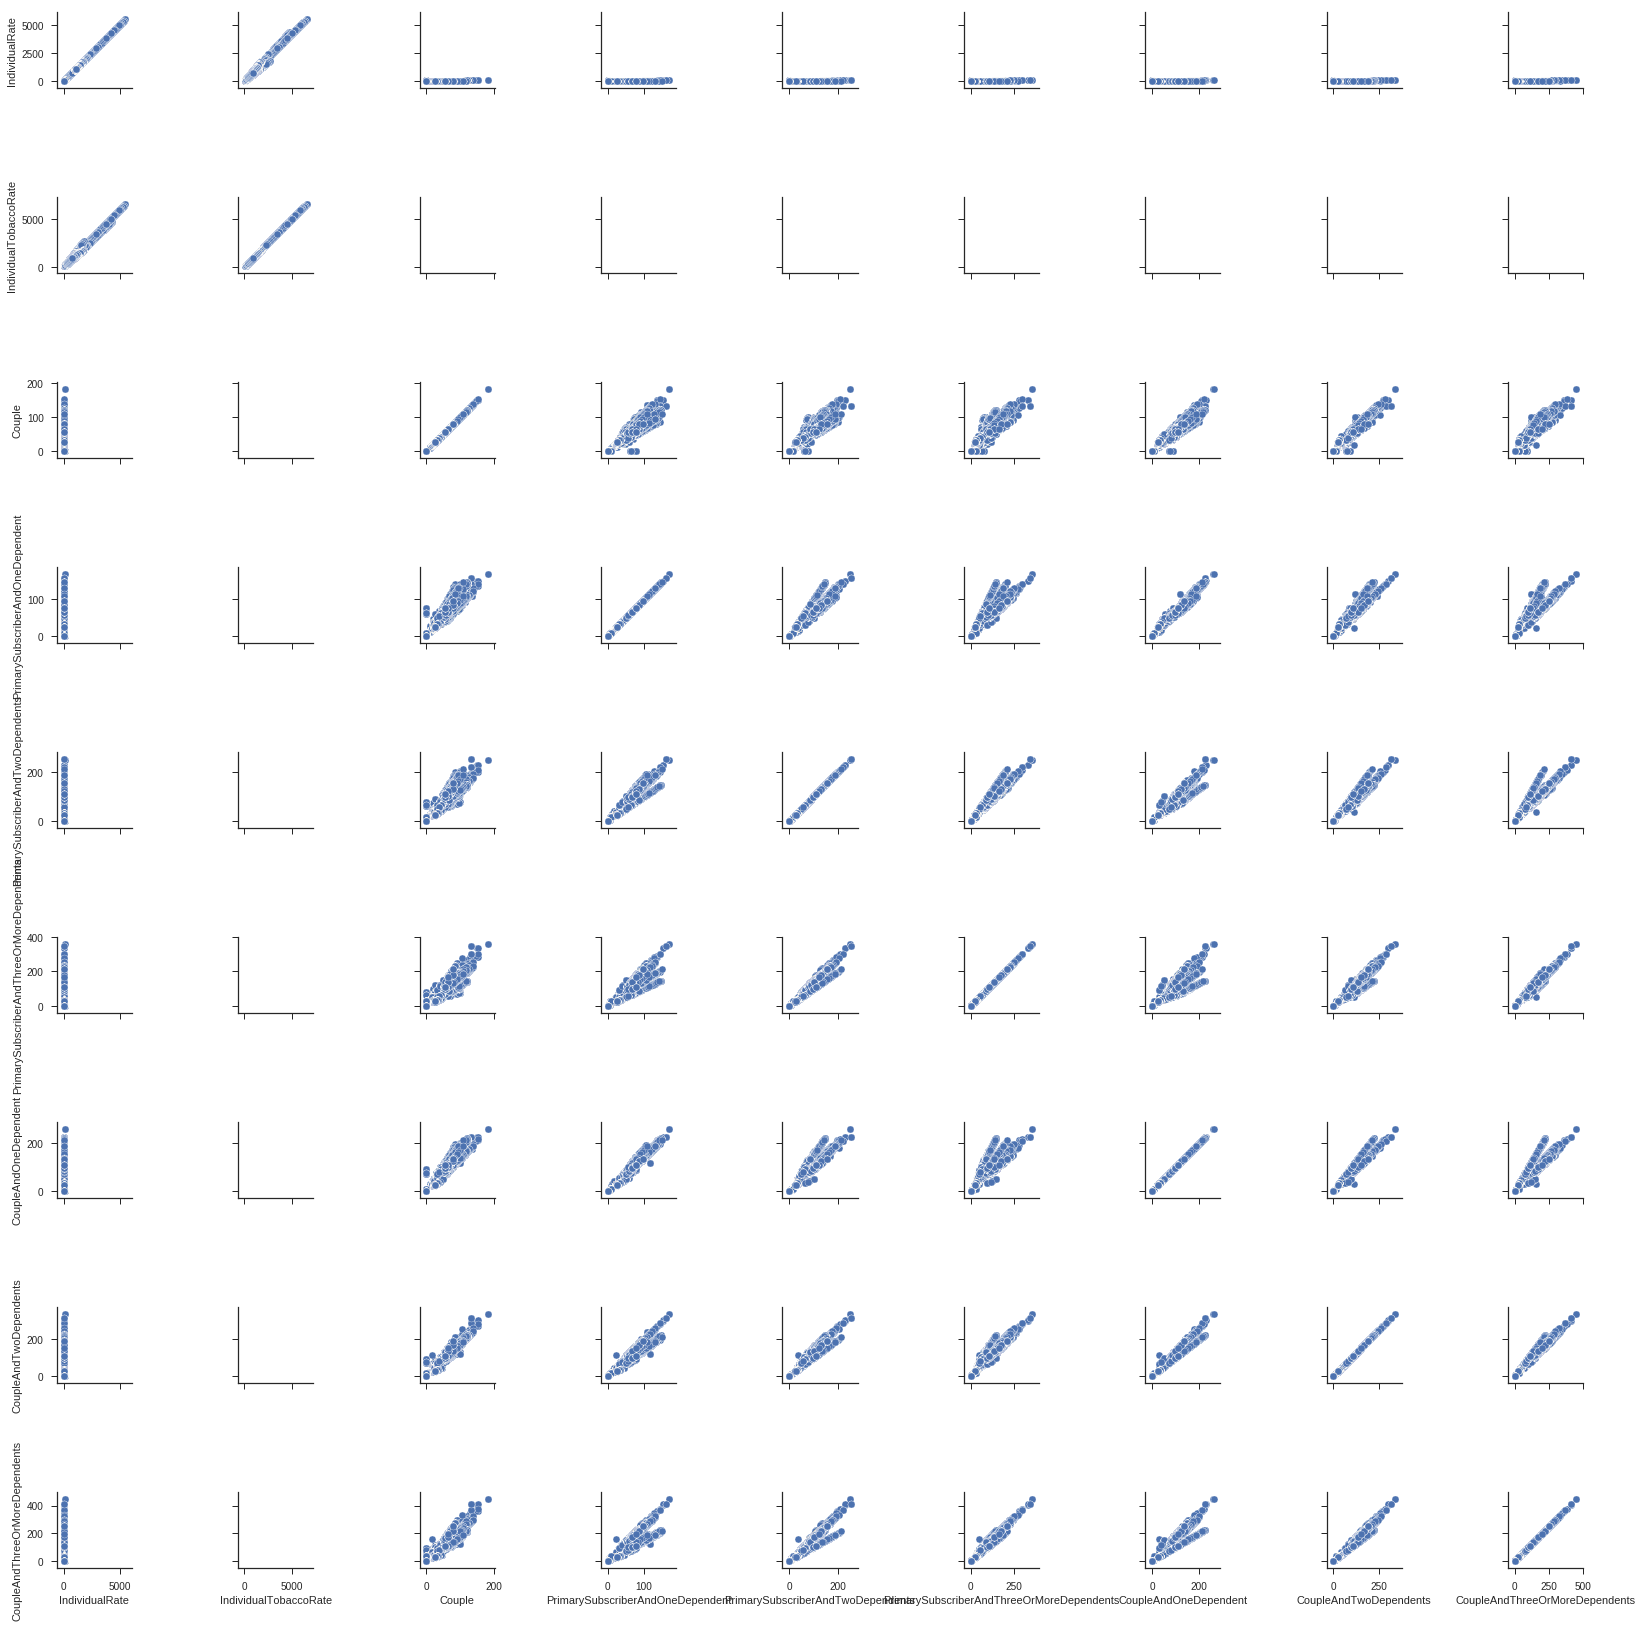

In [7]:
# i get an error when using the default histogram on the diagonal (but not if using pd.scatter_matrix...)
sns.pairplot(rate[rateCols],diag_kind=None);

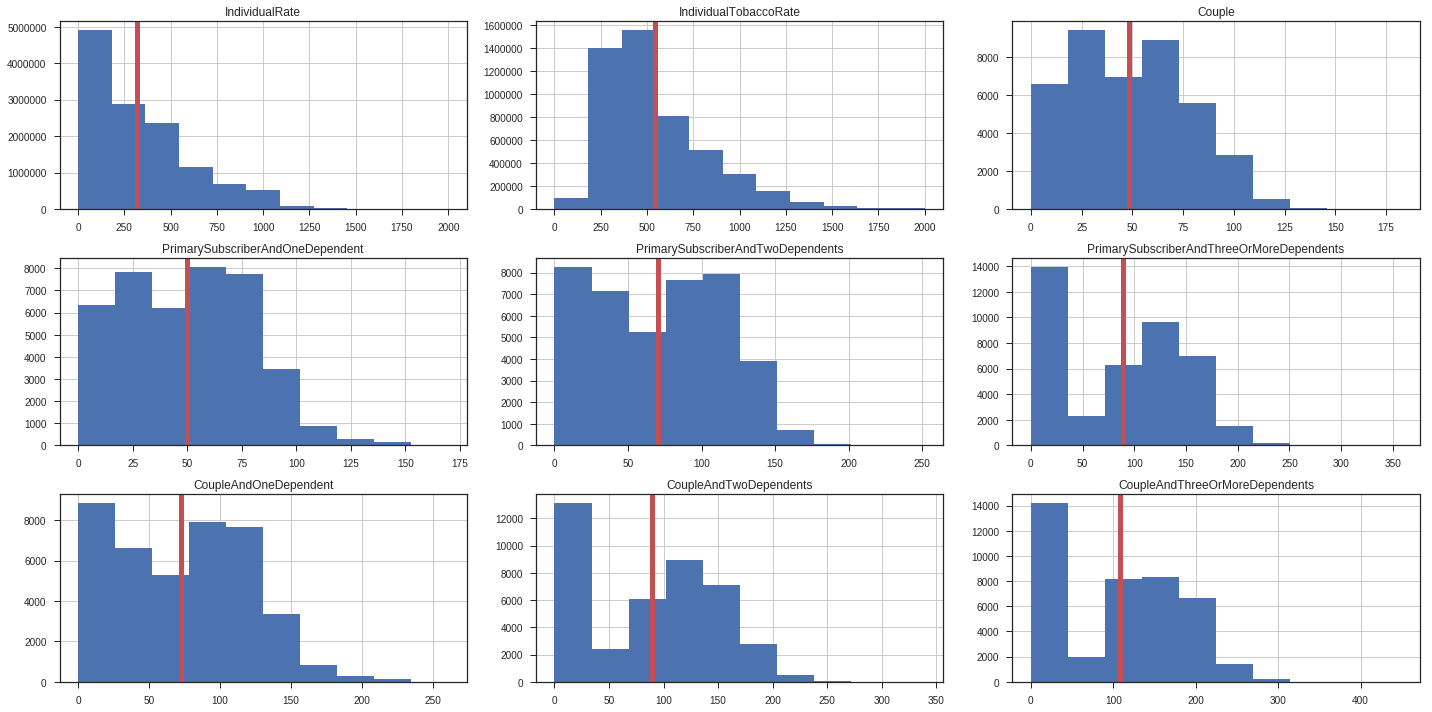

In [19]:
#viewing the histograms separately with a vertical red line at the mean
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(331+i)
    if 'Individual' in rateCols[i]:
        rate[rateCols[i]].hist(bins = np.linspace(0,2000,12))
    else: 
        rate[rateCols[i]].hist()
    plt.axvline(rate[rateCols[i]].mean(), c = 'r', lw = 5)
    plt.title(rateCols[i])
plt.tight_layout()

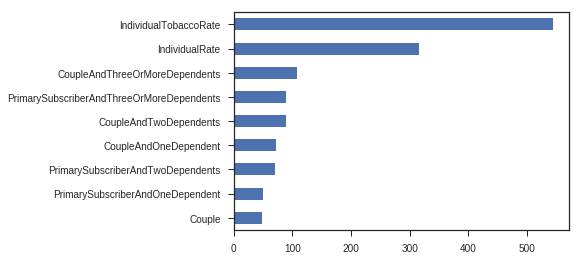

In [30]:
#Let us also look at the just the means for each column side-by-side.
rate[rateCols].mean().sort_values(ascending=True).plot(kind='barh')

The data shows significantly higher values for the two individual rates (IndividualRate, and IndividualTobaccoRate). In this data set we have the data broken down by state (New York, Texas, California, ...), is this the case in all states? We can also retrieve the metal levels for each plan and determine what metal levels cost the most.

In [83]:
# data = [x[0] for x in stateMeans.values()]
plt.gcf?

['NAME', 'STUSPS', 'LSAD', 'AWATER', 'RINGNUM', 'STATENS', 'SHAPENUM', 'AFFGEOID', 'GEOID', 'STATEFP', 'ALAND']


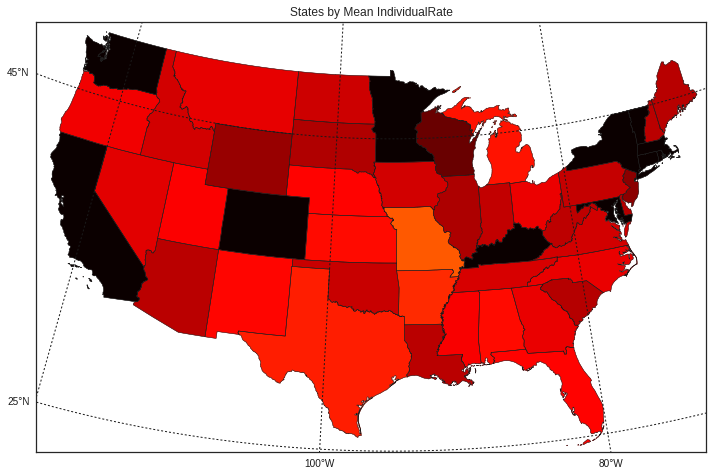

In [88]:
# adapted from basemap examples: https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
#need the following 3 state shape files from https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html
# cb_2016_us_state_5m.dbf
# cb_2016_us_state_5m.shp
# cb_2016_us_state_5m.shx

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
fig = plt.figure(figsize=(12,12))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
shp_info = m.readshapefile('cb_2016_us_state_5m','states',drawbounds=True)
#we need this to match the state names in the shape files
stateNames = {'AL' : 'Alabama', 'AK' : 'Alaska', 'AZ' : 'Arizona', 'AR' : 'Arkansas', 
              'CA' : 'California', 'CO' : 'Colorado', 'CT' : 'Connecticut', 'DE' : 'Delaware', 
              'DC' : 'District of Columbia', 'FL' : 'Florida', 'GA' : 'Georgia', 'HI' : 'Hawaii', 
              'ID' : 'Idaho', 'IL' : 'Illinois', 'IN' : 'Indiana', 'IA' : 'Iowa', 'KS' : 'Kansas', 
              'KY' : 'Kentucky', 'LA' : 'Louisiana', 'ME' : 'Maine', 'MD' : 'Maryland', 
              'MA' : 'Massachusetts', 'MI' : 'Michigan', 'MN' : 'Minnesota', 'MS' : 'Mississippi', 
              'MO' : 'Missouri', 'MT' : 'Montana', 'NE' : 'Nebraska', 'NV' : 'Nevada', 
              'NH' : 'New Hampshire', 'NJ' : 'New Jersey', 'NM' : 'New Mexico', 'NY' : 'New York', 
              'NC' : 'North Carolina', 'ND' : 'North Dakota', 'OH' : 'Ohio', 'OK' : 'Oklahoma', 
              'OR' : 'Oregon', 'PA' : 'Pennsylvania', 'RI' : 'Rhode Island', 'SC' : 'South Carolina', 
              'SD' : 'South Dakota', 'TN' : 'Tennessee', 'TX' : 'Texas', 'UT' : 'Utah', 
              'VT' : 'Vermont', 'VA' : 'Virginia', 'WA' : 'Washington', 'WV' : 'West Virginia', 
              'WI' : 'Wisconsin', 'WY' : 'Wyoming'}

# stateMeans = {}
# for key,item in stateNames.items():
#     stateMeans.update({item : rate[rate['StateCode']==key].loc[:,rateCols].mean()})
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 650 # set range.
print(m.states_info[0].keys())
skips = ['District of Columbia','Puerto Rico','American Samoa','Guam',
         'Commonwealth of the Northern Mariana Islands','United States Virgin Islands']
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in skips:
        pop = stateMeans[statename]['IndividualRate']
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in skips:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
# draw meridians and parallels.
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
# having trouble working out the color bar
plt.title('States by Mean IndividualRate')
plt.show()